# Relaxations of a single nanodisk

In this demo simulation we explore the relaxation behaviour of a single nanodisk. The same relaxation is performed with two different initial configurations of the magnetisation M.

First we import all the relevant modules and functions. We also change the logging level from the default 'DEBUG' to 'INFO' to avoid cluttering the notebook with lots of debugging message.

In [1]:
%matplotlib inline
from finmag.util.meshes import cylinder, plot_mesh
from finmag import sim_with
from finmag.util.helpers import vector_valued_function
from finmag.util.visualization import render_paraview_scene
import os
import re
import glob
import finmag
import numpy as np
finmag.set_logging_level("INFO")

[2014-09-12 15:02:08] INFO: Finmag logging output will be appended to file: '/home/mb4e10/.finmag/global.log'
[2014-09-12 15:02:08] DEBUG: Building modules in 'native'...
[2014-09-12 15:02:10] DEBUG: FinMag          5446:cd54936ea53a8a87e0d9ed1434e8fdd0f114d01e
[2014-09-12 15:02:10] DEBUG: Dolfin          1.4.0                Matplotlib      1.3.1               
[2014-09-12 15:02:10] DEBUG: Numpy           1.8.1                Scipy           0.14.0              
[2014-09-12 15:02:10] DEBUG: IPython         2.1.0                Python          2.7.6               
[2014-09-12 15:02:10] DEBUG: Paraview        4.0.1-1ubuntu1       Sundials        2.5.0               
[2014-09-12 15:02:10] DEBUG: Boost-Python    <unknown>            Linux           Ubuntu 14.04.1 LTS  
[2014-09-12 15:02:10] DEBUG: Registering debug signal handler. Press Ctrl-Z at any time to stop execution and jump into the debugger.


First we set the parameters which define the geometry, such as the disk radius/height and their separation. The two disks are put on the positive and negative x-axis with equal distances to the origin.

In [2]:
# Geometry parameters:

r = 25      # disk radius
h = 10      # disk height
maxh = 5.0  # mesh discretisation
unit_length = 1e-9  # the mesh units are given in nm

Next we set the material parameters for Permalloy and define the two values for the initial magnetisation.

In [3]:
# Material parameters
Ms = 8.6e5
A = 13.0e-12
alpha = 1.0
m_init_1 = np.array([-0.2, 0.1, 0.7])  # m_init for first disk
m_init_2 = np.array([0.3, 0.2, -0.6])  # m_init for second disk
demag_solver = 'FK'

We also define some helper strings used in filename, directory names etc., which make it easier to distinguish between simulations with different parameters.

In [4]:
geom_descr = "r_{:05.1f}__h_{:05.1f}__maxh_{:04.1f}".format(r, h, maxh)
sim_descr_1 = "sim_{}__m_init_{:03.1f}_{:03.1f}_{:03.1f}".format(geom_descr, m_init_1[0], m_init_1[1], m_init_1[2])
sim_descr_2 = "sim_{}__m_init_{:03.1f}_{:03.1f}_{:03.1f}".format(geom_descr, m_init_2[0], m_init_2[1], m_init_2[2])
meshfilename = os.path.join("meshes", "mesh__{}.geo".format(geom_descr))
#print "geom_descr: {}".format(geom_descr)
#print "sim_descr_1: {}".format(sim_descr_1)
#print "sim_descr_2: {}".format(sim_descr_2)
#print "meshfilename: {}".format(meshfilename)

Create the mesh and plot it to be sure that it looks ok. Unfortunately, matplotlib doesn't support equal aspect ratios for 3D plots (yet), but the axes labels indicate that the disk has the correct proportions.

[2014-09-12 15:02:17] WARNING: Warning: Ignoring netgen's output status of 34304.


/usr/lib/pymodules/python2.7/matplotlib/figure.py:1595: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


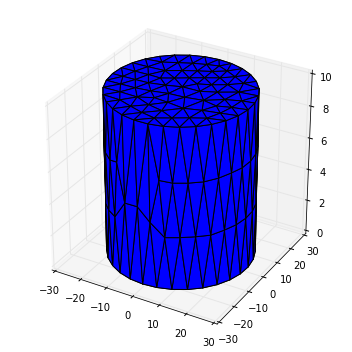

In [5]:
mesh = cylinder(r, h, maxh, filename=meshfilename)
plot_mesh(mesh, figsize=(10, 5))

## Relaxing the first nanodisk

Now create the Simulation object with the mesh and material parameters defined above, where the initial magnetisation equals `m_init_1`.

In [6]:
sim = sim_with(mesh, Ms=Ms, m_init=m_init_1, alpha=alpha,
               unit_length=unit_length, A=A,
               demag_solver=demag_solver,
               name="sim__relaxation_of_nanodisk_1")

[2014-09-12 15:02:20] INFO: Finmag logging output will be written to file: '/home/mb4e10/finmag/doc/ipython_notebooks_src/sim__relaxation_of_nanodisk_1.log' (any old content will be overwritten).
[2014-09-12 15:02:20] INFO: Creating Sim object 'sim__relaxation_of_nanodisk_1' (rank=0/1).
[2014-09-12 15:02:20] INFO: <Mesh of topological dimension 3 (tetrahedra) with 269 vertices and 799 cells, ordered>


Next, we relax the configuration. While doing so, we save vtk snapshots of the magnetisation configuration every 50 ps for later analysis. 

Since the simulation takes a few mintes to finish, we also print a message every 2.5 ns (of simulation time) to keep us informed about the progress (note that this would not be necessary if we had used the 'DEBUG' logging level above, but it is also a nice illustration of how to use the scheduler for these purposes).

In [7]:
def print_simulation_time(sim):
    finmag.logger.info("Reached simulation time: {} ns".format(sim.t * 1e9))

sim.schedule(print_simulation_time, every=2.5e-9)
sim.schedule('save_vtk', every=5e-11, filename='snapshots/{}/relaxation.pvd'.format(sim_descr_1), overwrite=True)
sim.overwrite_pvd_files = True
sim.relax()

[2014-09-12 15:02:22] INFO: Create integrator sundials with kwargs={}
[2014-09-12 15:02:22] INFO: Simulation will run until relaxation of the magnetisation.
[2014-09-12 15:02:22] INFO: Reached simulation time: 0.0 ns
[2014-09-12 15:02:25] INFO: Reached simulation time: 2.5 ns
[2014-09-12 15:02:29] INFO: Reached simulation time: 5.0 ns
[2014-09-12 15:02:31] INFO: Reached simulation time: 7.5 ns
[2014-09-12 15:02:34] INFO: Reached simulation time: 10.0 ns
[2014-09-12 15:02:37] INFO: Reached simulation time: 12.5 ns
[2014-09-12 15:02:39] INFO: Relaxation finished at time t = 1.4e-08.


Here is an image of the initial state. It shows that the disk has a uniform magnetisation which points in a relatively vertical direction (the color represents the z-component of M).

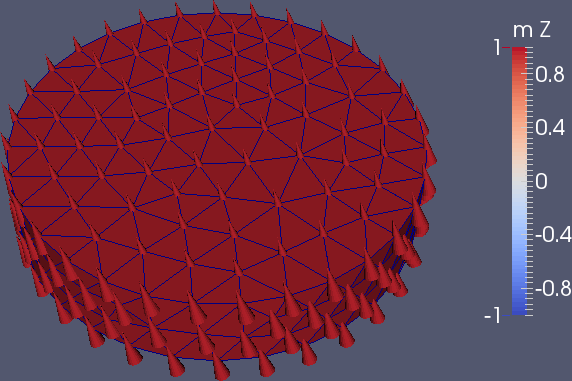

In [9]:
render_paraview_scene('snapshots/{}/relaxation.pvd'.format(sim_descr_1), timesteps=0,
                      outfile='snapshots/{}/initial_state.png'.format(sim_descr_1),
                      color_by_axis='Z', rescale_colormap_to_data_range=False, use_display=0)

And this is an image of the relaxed state, which shows that M now lies essentially in the plane of the disk (but is still uniform).

In [10]:
final_snapshot_1 = glob.glob('snapshots/{}/relaxation*.vtu'.format(sim_descr_1))[-1]
print "Final vtk snapshot: {}".format(final_snapshot_1)
m = re.search('relaxation(\d{6}).vtu', final_snapshot_1)
final_timestep_1 = int(m.group(1))

Final vtk snapshot: snapshots/sim_r_025.0__h_010.0__maxh_05.0__m_init_-0.2_0.1_0.7/relaxation000277.vtu


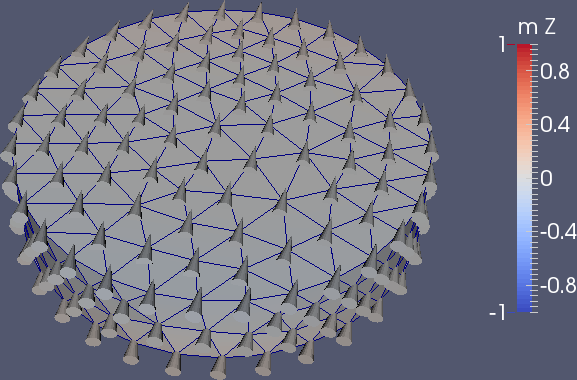

In [12]:
render_paraview_scene('snapshots/{}/relaxation.pvd'.format(sim_descr_1), timesteps=final_timestep_1,
                      outfile='snapshots/{}/relaxed_state.png'.format(sim_descr_1),
                      color_by_axis='Z', rescale_colormap_to_data_range=False, use_display=0)

## Second relaxation with different `m_init`

We now repeat the relaxation with the alternative value of m_init:

In [13]:
print "m_init_2: {}".format(m_init_2)

m_init_2: [ 0.3  0.2 -0.6]


In [14]:
sim2 = sim_with(mesh, Ms=Ms, m_init=m_init_2, alpha=alpha,
                unit_length=unit_length, A=A,
                demag_solver=demag_solver,
                name="sim__relaxation_of_nanodisk_2")

[2014-09-12 15:03:22] INFO: Finmag logging output will be written to file: '/home/mb4e10/finmag/doc/ipython_notebooks_src/sim__relaxation_of_nanodisk_2.log' (any old content will be overwritten).
[2014-09-12 15:03:22] INFO: Creating Sim object 'sim__relaxation_of_nanodisk_2' (rank=0/1).
[2014-09-12 15:03:22] INFO: <Mesh of topological dimension 3 (tetrahedra) with 269 vertices and 799 cells, ordered>


In [15]:
def print_simulation_time(sim):
    finmag.logger.info("Reached simulation time: {} ns".format(sim.t * 1e9))

sim2.schedule(print_simulation_time, every=2.5e-9)
sim2.schedule('save_vtk', every=5e-11, filename='snapshots/{}/relaxation.pvd'.format(sim_descr_2), overwrite=True)
sim2.relax()

[2014-09-12 15:03:23] INFO: Create integrator sundials with kwargs={}
[2014-09-12 15:03:23] INFO: Simulation will run until relaxation of the magnetisation.
[2014-09-12 15:03:23] INFO: Reached simulation time: 0.0 ns
[2014-09-12 15:03:28] INFO: Reached simulation time: 2.5 ns
[2014-09-12 15:03:31] INFO: Reached simulation time: 5.0 ns
[2014-09-12 15:03:33] INFO: Reached simulation time: 7.5 ns
[2014-09-12 15:03:35] INFO: Relaxation finished at time t = 9.3e-09.


This is the initial state (where M points down):

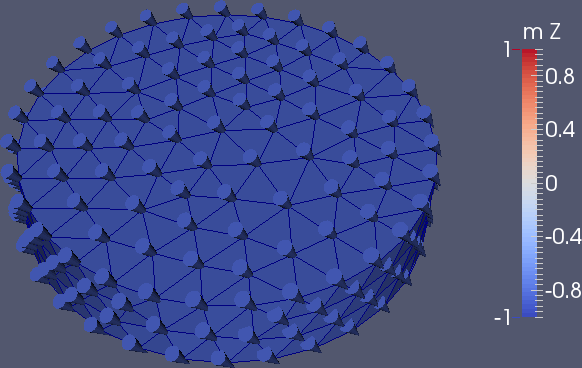

In [16]:
render_paraview_scene('snapshots/{}/relaxation.pvd'.format(sim_descr_2), timesteps=0,
                      outfile='snapshots/{}/initial_state.png'.format(sim_descr_2),
                      color_by_axis='Z', rescale_colormap_to_data_range=False, use_display=0)

And this is the relaxed state, where M points in-plane (but in a different direction than for the first relaxation):

In [17]:
final_snapshot_2 = glob.glob('snapshots/{}/relaxation*.vtu'.format(sim_descr_2))[-1]
print "Final vtk snapshot: {}".format(final_snapshot_2)
m = re.search('relaxation(\d{6}).vtu', final_snapshot_2)
final_timestep_2 = int(m.group(1))

Final vtk snapshot: snapshots/sim_r_025.0__h_010.0__maxh_05.0__m_init_0.3_0.2_-0.6/relaxation000072.vtu


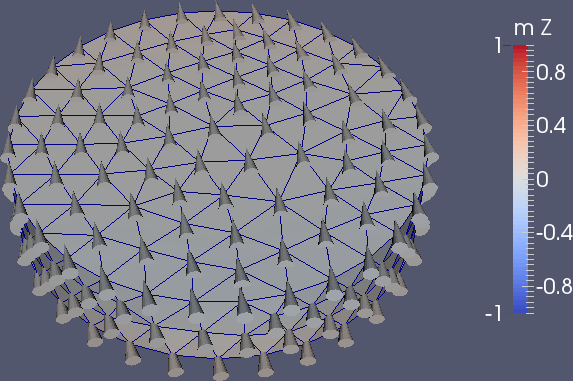

In [19]:
render_paraview_scene('snapshots/{}/relaxation.pvd'.format(sim_descr_2), timesteps=final_timestep_2,
                      outfile='snapshots/{}/relaxed_state.png'.format(sim_descr_2),
                      color_by_axis='Z', rescale_colormap_to_data_range=False, use_display=0)